In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Python_Videos/Classification_Algorithms_using_Vehicle_Silhouette_dataset/vehicle_silhoutte.csv')
# df is a dataframe
print(type(df))
df.head()  # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [50]:
df.shape
# num of rows=846, num of cols = 19

(846, 19)

#### Checking data types

In [53]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

#### Handling the null values

In [54]:
# nv = null value
nv = df.isnull().sum()
nv = nv[nv>0]
nv

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [55]:
cols_to_impute = nv.index
print(cols_to_impute)

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')


In [56]:
for i in cols_to_impute:
    df[i].fillna(df[i].mean(),inplace=True)

In [57]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [58]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

#### Handling Duplicates

In [59]:
df.duplicated().sum()

0

#### Checking the target variable

In [60]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

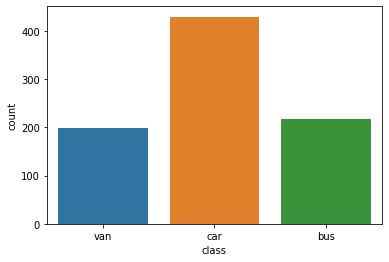

In [61]:
sns.countplot(x=df['class'])
plt.show()

#### Selecting the independent and dependent Features

In [62]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [63]:
x = df.iloc[:,:-1]   # x = df.drop('class',axis=1)
y = df.iloc[:,-1]    # y = df['class']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(846, 18)
(846,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [64]:
x.head(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196


In [65]:
y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

#### Splitting data into Training and Testing data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
print(846*0.25)

211.5


In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(634, 18)
(212, 18)
(634,)
(212,)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#### Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [69]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred,zero_division=0))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

#### LogisticRegression

In [70]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [72]:
mscore(lr)

Training Score 0.9668769716088328
Testing Score 0.9575471698113207


In [74]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

['car' 'car' 'car' 'van' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'bus' 'bus'
 'van' 'van' 'car' 'car' 'van' 'car' 'bus' 'car' 'van' 'car' 'bus' 'car'
 'van' 'van' 'bus' 'car' 'van' 'van' 'car' 'car' 'bus' 'car' 'bus' 'bus'
 'car' 'car' 'car' 'bus' 'car' 'bus' 'bus' 'van' 'van' 'bus' 'bus' 'car'
 'van' 'car' 'van' 'car' 'van' 'bus' 'bus' 'car' 'car' 'car' 'van' 'car'
 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'van' 'van' 'car' 'car'
 'van' 'van' 'van' 'car' 'car' 'car' 'car' 'car' 'bus' 'van' 'bus' 'van'
 'bus' 'car' 'bus' 'car' 'car' 'car' 'car' 'van' 'car' 'car' 'bus' 'car'
 'car' 'bus' 'van' 'bus' 'car' 'car' 'bus' 'car' 'bus' 'car' 'car' 'van'
 'bus' 'car' 'van' 'car' 'van' 'bus' 'bus' 'car' 'car' 'van' 'car' 'car'
 'car' 'bus' 'bus' 'van' 'van' 'car' 'bus' 'van' 'van' 'car' 'car' 'bus'
 'van' 'van' 'car' 'bus' 'car' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'bus'
 'car' 'car' 'car' 'car' 'car' 'bus' 'car' 'van' 'bus' 'car' 'car' 'car'
 'bus' 'bus' 'car' 'car' 'van' 'car' 'car' 'van' 'b

In [75]:
cls_eval(y_test,ypred_lr)

[[ 50   2   1]
 [  2 102   2]
 [  0   2  51]]
Accuracy Score 0.9575471698113207
              precision    recall  f1-score   support

         bus       0.96      0.94      0.95        53
         car       0.96      0.96      0.96       106
         van       0.94      0.96      0.95        53

    accuracy                           0.96       212
   macro avg       0.96      0.96      0.96       212
weighted avg       0.96      0.96      0.96       212



#### KNN Classifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)  # K = 5
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
mscore(knn)

Training Score 0.916403785488959
Testing Score 0.8349056603773585


In [100]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

['car' 'car' 'car' 'van' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'bus' 'bus'
 'van' 'van' 'car' 'car' 'van' 'car' 'car' 'car' 'van' 'car' 'car' 'car'
 'van' 'van' 'bus' 'car' 'car' 'van' 'car' 'car' 'bus' 'car' 'car' 'bus'
 'car' 'car' 'car' 'bus' 'car' 'bus' 'bus' 'van' 'van' 'bus' 'bus' 'car'
 'van' 'car' 'van' 'car' 'van' 'car' 'bus' 'car' 'car' 'car' 'van' 'bus'
 'car' 'car' 'bus' 'car' 'car' 'car' 'car' 'bus' 'bus' 'van' 'van' 'car'
 'van' 'van' 'car' 'car' 'car' 'car' 'car' 'bus' 'bus' 'bus' 'car' 'van'
 'bus' 'car' 'car' 'car' 'bus' 'car' 'car' 'van' 'car' 'car' 'bus' 'car'
 'car' 'bus' 'van' 'bus' 'car' 'car' 'bus' 'car' 'bus' 'car' 'car' 'van'
 'bus' 'bus' 'van' 'car' 'van' 'bus' 'bus' 'car' 'van' 'van' 'car' 'car'
 'car' 'bus' 'car' 'van' 'bus' 'car' 'bus' 'van' 'van' 'car' 'car' 'bus'
 'van' 'van' 'bus' 'bus' 'car' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'car'
 'car' 'car' 'bus' 'car' 'car' 'bus' 'bus' 'van' 'car' 'car' 'car' 'car'
 'bus' 'car' 'car' 'van' 'van' 'car' 'car' 'van' 'b

In [101]:
cls_eval(y_test,ypred_knn)

[[40 13  0]
 [12 90  4]
 [ 2  4 47]]
Accuracy Score 0.8349056603773585
              precision    recall  f1-score   support

         bus       0.74      0.75      0.75        53
         car       0.84      0.85      0.85       106
         van       0.92      0.89      0.90        53

    accuracy                           0.83       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.84      0.83      0.84       212



#### Decision Tree Classifier

In [102]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=20)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20)

In [104]:
mscore(dt)

Training Score 0.9526813880126183
Testing Score 0.8867924528301887


In [105]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

['car' 'car' 'car' 'van' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'car' 'bus'
 'car' 'van' 'car' 'car' 'van' 'car' 'bus' 'car' 'van' 'car' 'bus' 'car'
 'van' 'van' 'bus' 'car' 'van' 'van' 'car' 'car' 'bus' 'car' 'bus' 'bus'
 'car' 'car' 'car' 'bus' 'car' 'bus' 'bus' 'car' 'van' 'bus' 'car' 'car'
 'van' 'car' 'van' 'car' 'van' 'bus' 'bus' 'car' 'car' 'car' 'van' 'bus'
 'car' 'car' 'car' 'car' 'car' 'car' 'bus' 'van' 'bus' 'van' 'car' 'van'
 'van' 'van' 'van' 'car' 'car' 'car' 'car' 'car' 'bus' 'van' 'bus' 'van'
 'bus' 'car' 'bus' 'car' 'car' 'car' 'car' 'van' 'car' 'car' 'bus' 'car'
 'car' 'bus' 'van' 'bus' 'van' 'car' 'bus' 'car' 'bus' 'car' 'car' 'van'
 'bus' 'car' 'van' 'car' 'car' 'bus' 'bus' 'car' 'van' 'car' 'car' 'car'
 'car' 'bus' 'bus' 'van' 'bus' 'bus' 'bus' 'van' 'van' 'car' 'car' 'bus'
 'van' 'van' 'car' 'bus' 'car' 'car' 'bus' 'car' 'car' 'bus' 'car' 'car'
 'car' 'car' 'car' 'car' 'car' 'bus' 'car' 'van' 'bus' 'car' 'car' 'car'
 'bus' 'car' 'car' 'van' 'van' 'car' 'car' 'van' 'b

In [107]:
cls_eval(y_test,ypred_dt)

[[48  3  2]
 [ 4 96  6]
 [ 1  8 44]]
Accuracy Score 0.8867924528301887
              precision    recall  f1-score   support

         bus       0.91      0.91      0.91        53
         car       0.90      0.91      0.90       106
         van       0.85      0.83      0.84        53

    accuracy                           0.89       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.89      0.89      0.89       212



#### Plotting Decision Tree Model

In [108]:
fn = x_train.columns
cn = ['car','bus','van']

In [109]:
from sklearn.tree import plot_tree

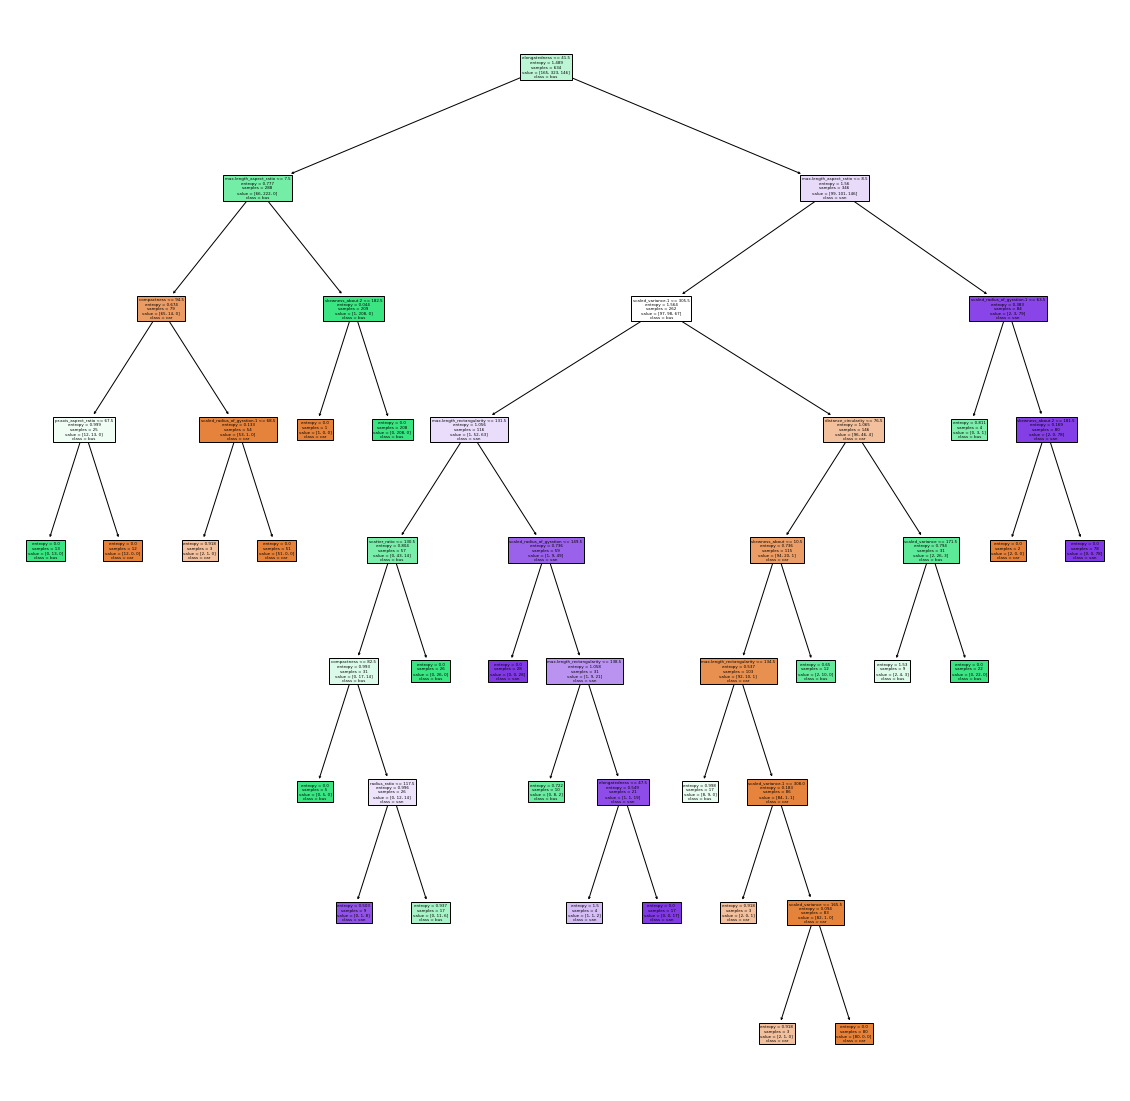

In [110]:
plt.figure(figsize=(20,20))
plot_tree(dt,class_names=cn,feature_names=fn,filled=True)
plt.show()

#### RandomForest

In [111]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=15,max_depth=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=15, n_estimators=80)

In [113]:
mscore(rf)

Training Score 0.9952681388012619
Testing Score 0.9150943396226415


In [114]:
ypred_rf = rf.predict(x_test)
print(ypred_rf)

['car' 'car' 'car' 'van' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'bus' 'bus'
 'van' 'van' 'car' 'car' 'van' 'car' 'bus' 'car' 'van' 'car' 'bus' 'car'
 'van' 'van' 'bus' 'car' 'car' 'van' 'car' 'car' 'bus' 'car' 'bus' 'bus'
 'car' 'van' 'car' 'bus' 'car' 'bus' 'bus' 'car' 'van' 'bus' 'car' 'car'
 'van' 'car' 'van' 'car' 'van' 'bus' 'bus' 'car' 'car' 'car' 'van' 'bus'
 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'van' 'bus' 'van' 'car' 'car'
 'van' 'van' 'van' 'car' 'car' 'car' 'car' 'car' 'bus' 'van' 'bus' 'van'
 'bus' 'car' 'car' 'car' 'car' 'car' 'car' 'van' 'car' 'car' 'bus' 'car'
 'car' 'bus' 'van' 'bus' 'car' 'car' 'bus' 'car' 'bus' 'car' 'car' 'van'
 'bus' 'bus' 'van' 'car' 'van' 'bus' 'bus' 'car' 'car' 'car' 'car' 'car'
 'car' 'bus' 'bus' 'van' 'bus' 'car' 'bus' 'van' 'van' 'car' 'car' 'bus'
 'van' 'van' 'bus' 'bus' 'car' 'car' 'bus' 'van' 'bus' 'bus' 'car' 'car'
 'car' 'car' 'car' 'car' 'car' 'bus' 'van' 'van' 'bus' 'car' 'car' 'car'
 'bus' 'bus' 'car' 'van' 'van' 'car' 'car' 'van' 'b

In [115]:
cls_eval(y_test,ypred_rf)

[[51  1  1]
 [ 2 98  6]
 [ 1  7 45]]
Accuracy Score 0.9150943396226415
              precision    recall  f1-score   support

         bus       0.94      0.96      0.95        53
         car       0.92      0.92      0.92       106
         van       0.87      0.85      0.86        53

    accuracy                           0.92       212
   macro avg       0.91      0.91      0.91       212
weighted avg       0.91      0.92      0.91       212



### Plot RandomForest

In [116]:
from sklearn.tree import plot_tree

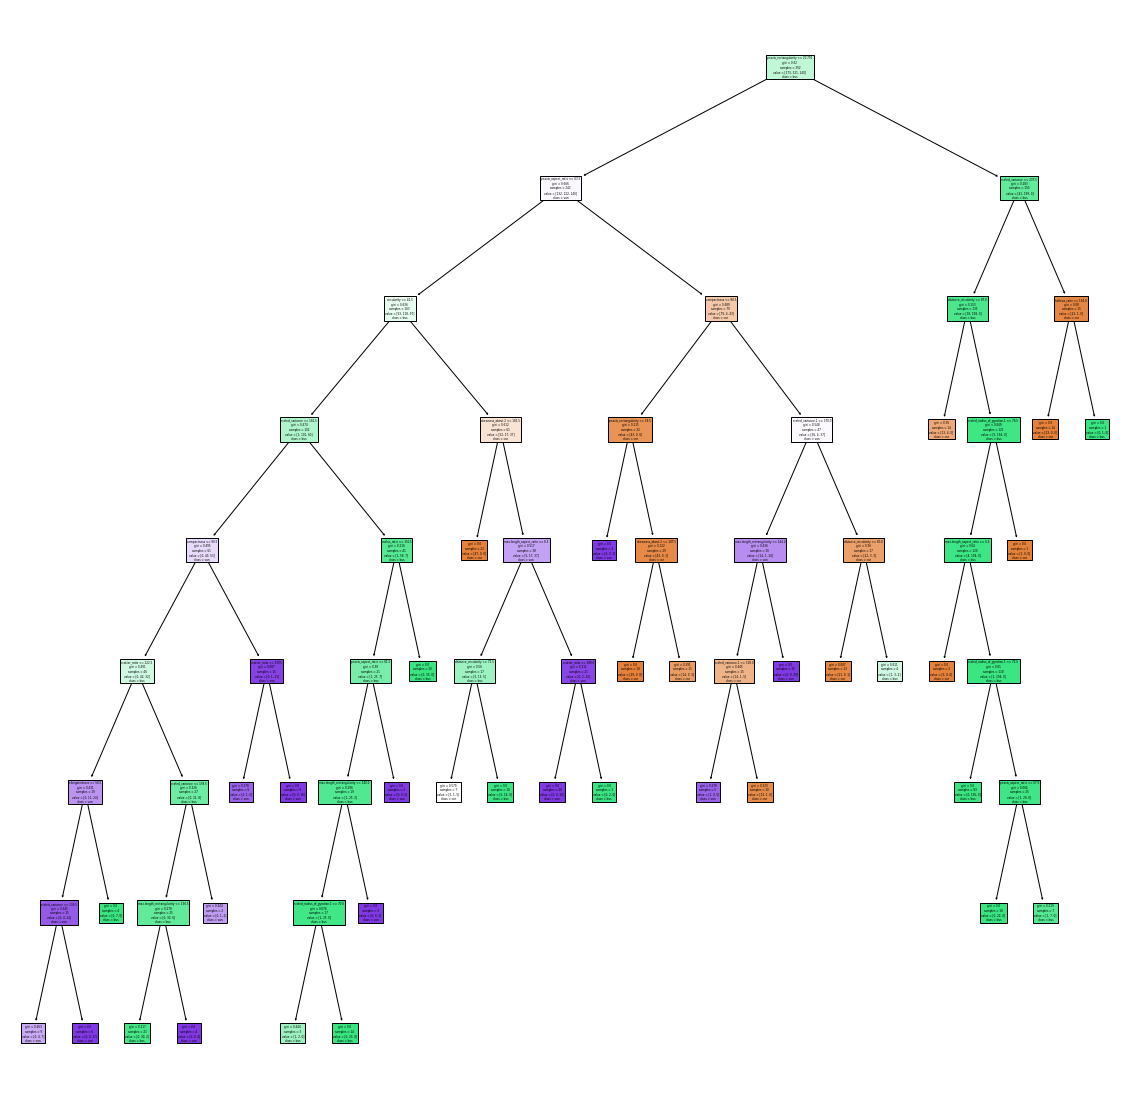

In [117]:
plt.figure(figsize=(20,20))
# Deciion tree with index 0
plot_tree(rf.estimators_[0],class_names=cn,feature_names=fn,filled=True)
plt.show()

#### Comparing the performance of different Classification models based on their Accuracy

In [119]:
performance = {'LogReg':accuracy_score(y_test,ypred_lr),
               'KNN ':accuracy_score(y_test,ypred_knn),
               'Decision Tree':accuracy_score(y_test,ypred_dt),
               'Random Forest':accuracy_score(y_test,ypred_rf)}

res = pd.DataFrame(performance,index=['Accuracy'])
res.T # T indicates Transpose

,Accuracy
LogReg,0.957547
KNN,0.834906
Decision Tree,0.886792
Random Forest,0.915094
